In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('Sales_Data_CSV.csv')

In [3]:
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
sales.shape

(51290, 21)

In [5]:
sales.info

<bound method DataFrame.info of               order_id  order_date ship_date       ship_mode  \
0         AG-2011-2040    1/1/2011  6/1/2011  Standard Class   
1        IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
2         HU-2011-1220    1/1/2011  5/1/2011    Second Class   
3      IT-2011-3647632    1/1/2011  5/1/2011    Second Class   
4        IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
...                ...         ...       ...             ...   
51285   CA-2014-115427  31-12-2014  4/1/2015  Standard Class   
51286     MO-2014-2560  31-12-2014  5/1/2015  Standard Class   
51287   MX-2014-110527  31-12-2014  2/1/2015    Second Class   
51288   MX-2014-114783  31-12-2014  6/1/2015  Standard Class   
51289   CA-2014-156720  31-12-2014  4/1/2015  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer 

In [6]:
sales.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [7]:
sales.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
sales.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [9]:
sales.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [10]:
sales["order_date"].min()

'1/1/2011'

In [11]:
sales["order_date"].max()

'9/9/2014'

In [13]:
for col in ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']:
    sales[col] = sales[col].replace({',': ''}, regex=True)
    sales[col] = pd.to_numeric(sales[col])

sales[['sales', 'quantity', 'discount', 'profit', 'shipping_cost']].corr()

,sales,quantity,discount,profit,shipping_cost
sales,1.000000,0.313580,-0.086728,0.485944,0.768075
quantity,0.313580,1.000000,-0.019875,0.104743,0.272649
discount,-0.086728,-0.019875,1.000000,-0.316375,-0.079056
profit,0.485944,0.104743,-0.316375,1.000000,0.357033
shipping_cost,0.768075,0.272649,-0.079056,0.357033,1.000000


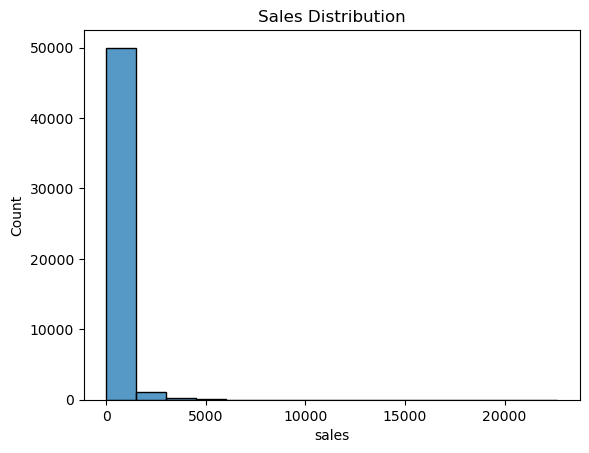

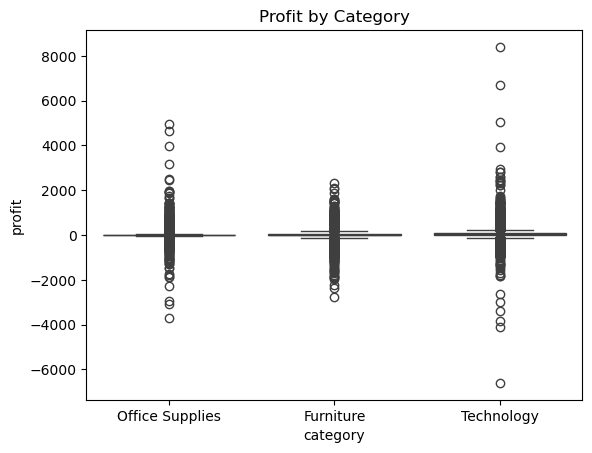

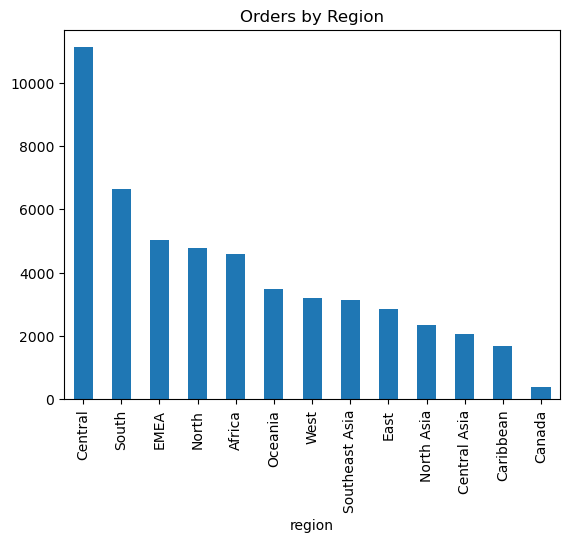

In [14]:
# Distribution of sales
sns.histplot(sales['sales'], bins=15)
plt.title('Sales Distribution')
plt.show()

# Boxplot of profit by category
sns.boxplot(x='category', y='profit', data=sales)
plt.title('Profit by Category')
plt.show()

# Bar plot for the number of orders by region
sales['region'].value_counts().plot(kind='bar')
plt.title('Orders by Region')
plt.show()

In [15]:
def parse_date(date_str):
    try:
        return datetime.strptime(date_str, '%m/%d/%Y')
    except ValueError:
        try: 
            return datetime.strptime(date_str, '%d-%m-%Y')
        except ValueError:
            return

In [16]:
sales['order_date']

0          1/1/2011
1          1/1/2011
2          1/1/2011
3          1/1/2011
4          1/1/2011
            ...    
51285    31-12-2014
51286    31-12-2014
51287    31-12-2014
51288    31-12-2014
51289    31-12-2014
Name: order_date, Length: 51290, dtype: object

In [17]:
from datetime import datetime
sales['order_date'] = sales['order_date'].apply(parse_date)

In [18]:
sales['order_date']

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
51285   2014-12-31
51286   2014-12-31
51287   2014-12-31
51288   2014-12-31
51289   2014-12-31
Name: order_date, Length: 51290, dtype: datetime64[ns]

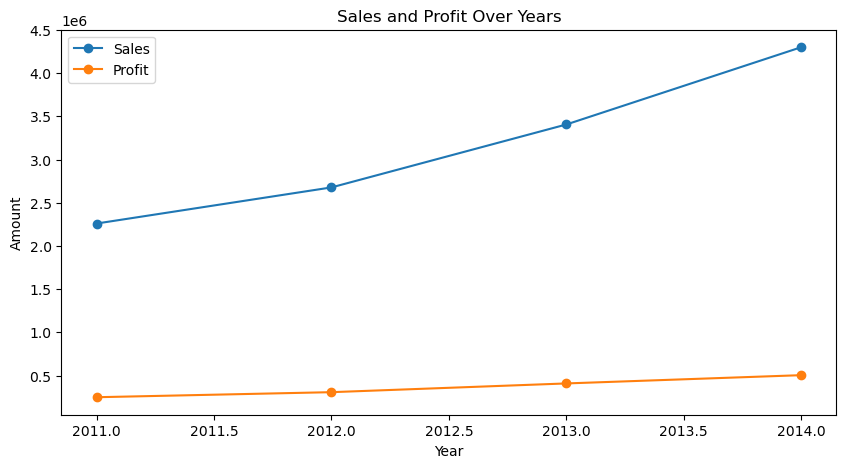

In [19]:
# Convert order_date to datetime
sales['order_date'] = pd.to_datetime(sales['order_date'])

# Grouping sales and profit by year
sales_by_year = sales.groupby('year')['sales'].sum()
profit_by_year = sales.groupby('year')['profit'].sum()

# Plot sales and profit trends over the years
plt.figure(figsize=(10, 5))
sales_by_year.plot(label='Sales', marker='o')
profit_by_year.plot(label='Profit', marker='o')
plt.title('Sales and Profit Over Years')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [21]:
sales_by_year

year
2011    2259511
2012    2677493
2013    3405860
2014    4300041
Name: sales, dtype: int64

In [22]:
profit_by_year

year
2011    248940.81154
2012    307415.27910
2013    408512.76018
2014    504165.97046
Name: profit, dtype: float64

In [25]:
sales.groupby('year')[['sales', 'quantity', 'discount', 'profit', 'shipping_cost']].sum()

,sales,quantity,discount,profit,shipping_cost
year,,,,,
2011,2259511,31443,1333.394,248940.81154,244271.08
2012,2677493,38111,1548.774,307415.27910,283491.89
2013,3405860,48136,1935.522,408512.76018,364549.95
2014,4300041,60622,2512.038,504165.97046,460507.77


In [16]:
# Top products by sales
top_products = sales.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Top customers by sales
top_customers = sales.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(10)
print(top_customers)

# Top states by sales
top_states = sales.groupby('state')['sales'].sum().sort_values(ascending=False).head(10)
print(top_states)

product_name
Apple Smart Phone, Full Size                                86936
Cisco Smart Phone, Full Size                                76441
Motorola Smart Phone, Full Size                             73159
Nokia Smart Phone, Full Size                                71904
Canon imageCLASS 2200 Advanced Copier                       61600
Hon Executive Leather Armchair, Adjustable                  58200
Office Star Executive Leather Armchair, Adjustable          50667
Harbour Creations Executive Leather Armchair, Adjustable    50120
Samsung Smart Phone, Cordless                               48654
Nokia Smart Phone, with Caller ID                           47880
Name: sales, dtype: int64
customer_name
Tom Ashbrook          40489
Tamara Chand          37453
Greg Tran             35552
Christopher Conant    35187
Sean Miller           35170
Bart Watters          32315
Natalie Fritzler      31778
Fred Hopkins          30404
Jane Waco             30288
Hunter Lopez          30246
Name: s

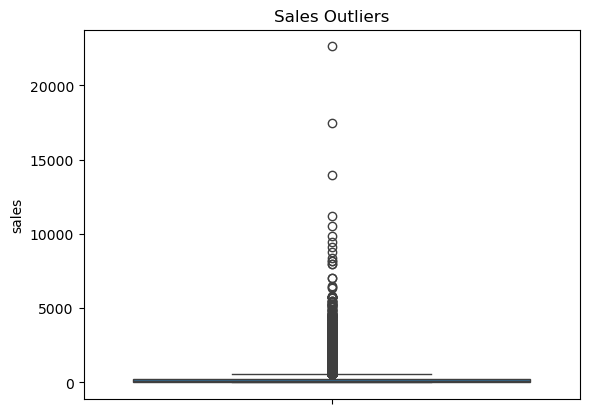

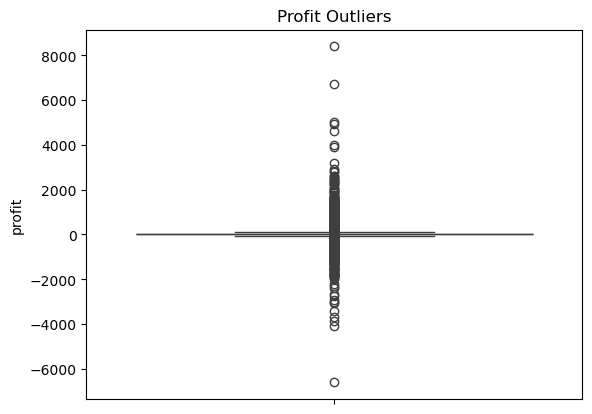

In [17]:
# Boxplot to detect outliers in sales
sns.boxplot(sales['sales'])
plt.title('Sales Outliers')
plt.show()

# Boxplot to detect outliers in profit
sns.boxplot(sales['profit'])
plt.title('Profit Outliers')
plt.show()

In [18]:
sales_pivot = sales.pivot_table(values='sales', index='year', columns='category', aggfunc='sum')
print(sales_pivot)

category  Furniture  Office Supplies  Technology
year                                            
2011         756171           675642      827698
2012         858913           795113     1023467
2013        1117739          1010793     1277328
2014        1378061          1305782     1616198


New EDA

<Axes: xlabel='week'>

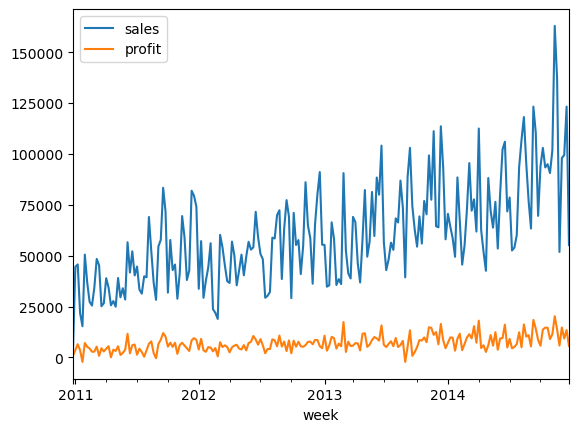

In [19]:
# Set order_date to datetime if not already done
sales['order_date'] = pd.to_datetime(sales['order_date'])

# Create a new 'week' column based on order_date
sales['week'] = sales['order_date'].dt.to_period('W').apply(lambda r: r.start_time)

# Aggregate by week
weekly_sales = sales.groupby('week').agg({
    'sales': 'sum',
    'profit': 'sum',
    'quantity': 'sum',  # Sum quantities sold
    # Add more metrics as needed, e.g., avg discount
}).reset_index()

# Plot weekly trends
weekly_sales.plot(x='week', y=['sales', 'profit'], kind='line')


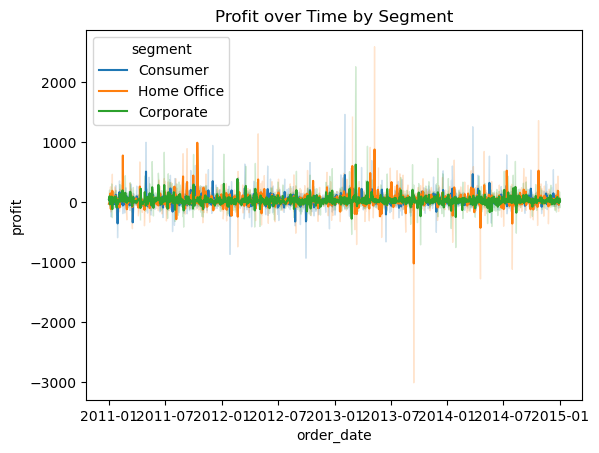

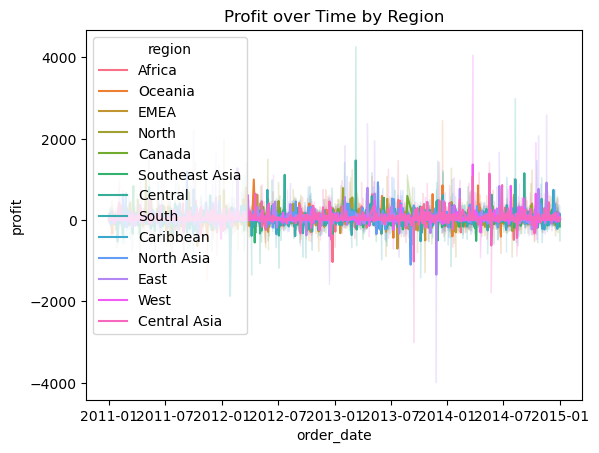

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot profit by segment
sns.lineplot(data=sales, x='order_date', y='profit', hue='segment')
plt.title('Profit over Time by Segment')
plt.show()

# Plot profit by region
sns.lineplot(data=sales, x='order_date', y='profit', hue='region')
plt.title('Profit over Time by Region')
plt.show()

# You can repeat this for category and order_priority


In [21]:
# Total profit per segment
segment_profit = sales.groupby('segment')['profit'].sum()
print(segment_profit)

# Max/min profit dates
max_profit_date = sales[sales['profit'] == sales['profit'].max()]['order_date']
min_profit_date = sales[sales['profit'] == sales['profit'].min()]['order_date']
print(f'Max profit date: {max_profit_date}, Min profit date: {min_profit_date}')


segment
Consumer       749239.78206
Corporate      442785.85866
Home Office    277009.18056
Name: profit, dtype: float64
Max profit date: 29530   2013-03-10
Name: order_date, dtype: datetime64[ns], Min profit date: 31884   2013-11-26
Name: order_date, dtype: datetime64[ns]


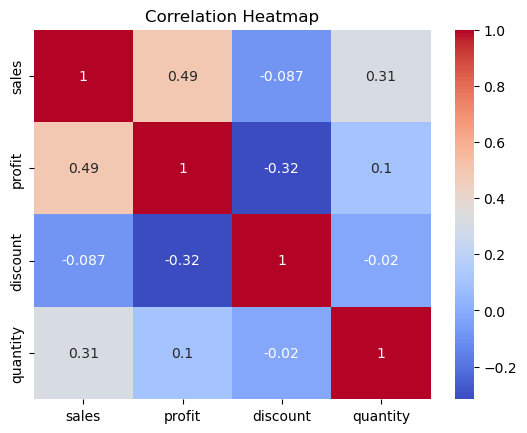

In [22]:
corr = sales[['sales', 'profit', 'discount', 'quantity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
